Previously called 'lr-schedule.ipynb'

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast

In [2]:
def parse_history(path):
    with open(path) as file:
        # loss - acc - val_los - val_acc
        loss = file.readline()
        acc = file.readline()
        val_loss = file.readline()
        val_acc = file.readline()
        
        history = {
            "loss": ast.literal_eval(loss.split(":")[-1].strip()),
            "sparse_categorical_accuracy": ast.literal_eval(acc.split(":")[-1].strip()),
            "val_loss": ast.literal_eval(val_loss.split(":")[-1].strip()),
            "val_sparse_categorical_accuracy": ast.literal_eval(val_acc.split(":")[-1].strip())
        }
        
        return history

In [3]:
def savefig(name):
    plt.savefig("figures/nss_"+name+".pdf", format="pdf")

In [18]:
def plot_lr_and_accuracy(history):
    sns.set()
    SMALL_SIZE = 12
    MEDIUM_SIZE = 14
    BIGGER_SIZE = 16
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    acc = history['sparse_categorical_accuracy']
    val_acc = history['val_sparse_categorical_accuracy']

    loss = history['loss']
    val_loss = history['val_loss']
    
    epochs_range = range(len(acc))
    
    try:
        lr = history['lr']
        # Plot the learning rate
        plt.figure(figsize=(8, 6))
        plt.plot(epochs_range, lr, label='Learning Rate')
        plt.xlabel('Epoch')
        plt.ylabel('Learnign rate')
        plt.title('Learning Rate development during training');
        plt.tight_layout()
        savefig("learning_rate")
    except KeyError:
        pass
    
    # Plot train-val accuracy and loss
    plt.figure(figsize=(14, 6))
    # Subplot 1
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='upper left')
    plt.ylim([0, 1])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')

    # Subplot 2
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper left')
    plt.ylim([0.0, np.max(val_loss)])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.tight_layout()
    savefig("kvacap_weighted")
    plt.show()

In [19]:
path = "/home/henriklg/master-thesis/code/kvasir-capsule/experiments/weighted_split0/0_teacher/history.txt"
history = parse_history(path)

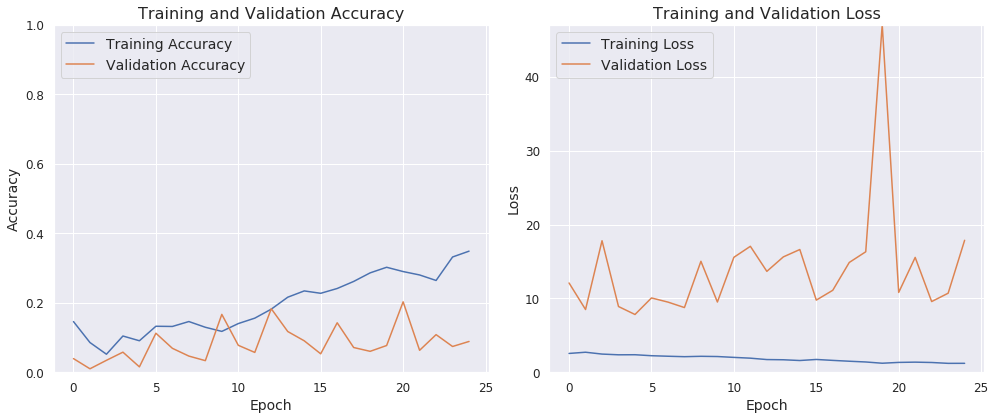

In [20]:
plot_lr_and_accuracy(history)

In [ ]:
no_schedule_conf = {
    "log_dir": ".",
    "decay_rate": 0
    }

# schedule_model = tf.keras.models.load_model('/home/henriklg/master-thesis/code/hyper-kvasir/experiments/lr-and-decay/no-lr-schedule/teacher1/model')
no_schedule_history = {
    "loss": [1.1637950817058826, 0.46229740643295747, 0.32947860709552107, 0.24249004161563412, 0.224492944391637, 0.19825803308651366, 0.19022884284114017, 0.1437603115778545, 0.14431178608331188, 0.13891161676367808, 0.11557708089721613, 0.12180232982440241, 0.10897697097268598, 0.10853767028913416, 0.09007069179467087, 0.10522599152192988, 0.09971576457008205, 0.09827807291956811, 0.08711576349390991, 0.07265690422681129, 0.07983574213395858, 0.06607556998215873, 0.0825718900766866, 0.0719167466500196, 0.0747432014102052, 0.06019780142553922, 0.06239378863367541, 0.06446286925146806, 0.05902942845694207, 0.056424338747907817],
    "sparse_categorical_accuracy": [0.62917566, 0.83539873, 0.88564116, 0.91662174, 0.92362607, 0.93022627, 0.9350754, 0.9498922, 0.95137393, 0.953125, 0.9599946, 0.9612069, 0.962958, 0.96363145, 0.97130924, 0.9675377, 0.96875, 0.9665948, 0.9699623, 0.9765625, 0.97373384, 0.97993, 0.9746767, 0.9769666, 0.97817886, 0.98141164, 0.98019934, 0.9787177, 0.9811422, 0.9819504],
    "val_loss": [1.8414675096670787, 1.182561566432317, 0.8202232172091802, 0.8103452871243159, 0.8015178839365641, 0.6276221747199694, 0.5826062882939974, 0.7219210813442866, 0.5833089227477709, 0.5700906813144684, 0.6441441774368286, 0.5990723644693693, 0.7399516304334005, 0.7129075626532236, 0.6410528471072515, 0.6035363127787908, 0.7675732945402464, 0.7429806043704351, 0.7180024708310763, 0.733803058664004, 0.7426321506500244, 0.7523655196030935, 0.8623674412568411, 0.8929086625576019, 0.6311472803354263, 0.6899732028444608, 0.8136973877747854, 0.8495854710539182, 0.8948861559232076, 0.8777928799390793],
    "val_sparse_categorical_accuracy": [0.5449219, 0.7057292, 0.7923177, 0.81640625, 0.828125, 0.84309894, 0.86588544, 0.859375, 0.8704427, 0.8613281, 0.8561198, 0.8723958, 0.8639323, 0.8782552, 0.8639323, 0.8626302, 0.85807294, 0.8645833, 0.859375, 0.86848956, 0.8691406, 0.875, 0.83984375, 0.8457031, 0.8691406, 0.8795573, 0.85872394, 0.85026044, 0.8567708, 0.86067706]
}

plot_lr_and_accuracy(no_schedule_history, no_schedule_conf)

In [ ]:
schedule_conf = {
    "log_dir": ".",
    "decay_rate": 0.2
    }

# no_schedule_model = tf.keras.models.load_model('/home/henriklg/master-thesis/code/hyper-kvasir/experiments/lr-and-decay/lr-schedule/teacher1/model')
schedule_history = {
    "loss": [1.8706907650520062, 1.0401302997408242, 0.7616500823662199, 0.6653877882094219, 0.5716848943767876, 0.49232040602585364, 0.4541560796828106, 0.3836247193916091, 0.3746621061501832, 0.3331364406080082, 0.299818761389831, 0.2592762464593197, 0.24242545330318913, 0.24099819927380003, 0.20550504018520488, 0.20596670359373093, 0.17768867416628475, 0.17044595821664252, 0.1618205290287733, 0.1481001129823512, 0.13079868796570548, 0.1330808361928011, 0.12967993543836578, 0.1102112197028152, 0.10131124702507052, 0.10167975126412408, 0.0994261774587734, 0.10325117438132393, 0.08523392735113358, 0.08522339743273012],
    "sparse_categorical_accuracy": [0.40827048, 0.60210127, 0.7054149, 0.7490571, 0.7891972, 0.8114224, 0.83647627, 0.8585668, 0.867861, 0.8795797, 0.8912985, 0.9043642, 0.91136855, 0.91352373, 0.9251078, 0.92537713, 0.9373653, 0.9381735, 0.94356143, 0.94585127, 0.9532597, 0.9524515, 0.95581895, 0.9597252, 0.96376616, 0.96349674, 0.96376616, 0.96524787, 0.9710399, 0.9706358],
    "val_loss": [401.7278772989909, 38.43989276885986, 10.906838655471802, 3.515106519063314, 2.2753985126813254, 0.8418581634759903, 0.7980302025874456, 0.695555346707503, 0.5451535483201345, 0.5398281738162041, 0.5341771791378657, 0.5376704384883245, 0.5598251223564148, 0.515444296101729, 0.6499722674489021, 0.5405737484494845, 0.6009077231089274, 0.5794200599193573, 0.6124295294284821, 0.5934077625473341, 0.6496637711922327, 0.6653051525354385, 0.6100464314222336, 0.6185432150959969, 0.6528116911649704, 0.6940998161832491, 0.6385702714323997, 0.6794871042172114, 0.7032269487778345, 0.7059516459703445],
    "val_sparse_categorical_accuracy": [0.012369792, 0.092447914, 0.2389323, 0.5026042, 0.6061198, 0.7441406, 0.76692706, 0.7936198, 0.83463544, 0.8535156, 0.83723956, 0.8515625, 0.85286456, 0.8652344, 0.82942706, 0.85546875, 0.84440106, 0.8561198, 0.8515625, 0.859375, 0.8535156, 0.8574219, 0.86588544, 0.8652344, 0.859375, 0.85546875, 0.87369794, 0.8463542, 0.8639323, 0.85807294],
    "lr": [0.01, 0.006937799, 0.0053113555, 0.0043026707, 0.00361596, 0.0031182796, 0.0027410209, 0.002445194, 0.0022070014, 0.0020110956, 0.0018471337, 0.0017078916, 0.0015881709, 0.001484135, 0.0013928914, 0.0013122172, 0.0012403764, 0.0011759935, 0.0011179645, 0.0010653931, 0.0010175438, 0.00097380794, 0.0009336768, 0.0008967223, 0.0008625818, 0.00083094556, 0.00080154784, 0.0007741591, 0.00074858026, 0.0007246377]
}

plot_lr_and_accuracy(schedule_history, schedule_conf)